In [1]:
%reset
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import netCDF4
%matplotlib inline

import cmocean
import os
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


## First compute grid thicknesses:

In [7]:
grdfile = '/glade/u/home/eyankovsky/CWorthy/epac25km_grd.nc'
grd = xr.open_dataset(grdfile)
dx = 1/grd.pm; dy = 1/grd.pn;
area=dx*dy

def Cs(sigma, theta_s, theta_b):
    C = ( 1 - np.cosh(theta_s * sigma) ) / (np.cosh(theta_s) - 1)
    C = (np.exp(theta_b * C) - 1) / (1 - np.exp(-theta_b))
    return C

def get_thickness(zeta, h):
    
    N = 100
    theta_s = 6
    theta_b = 6
    hc = 250

    k_w = np.linspace(0,N,N+1)

    sigma_w = (k_w - N) / N

    Cs_w = Cs(sigma_w, theta_s, theta_b)

    S_w = np.zeros((N+1, h.shape[0], h.shape[1]))

    for k in range(N+1):
        S_w[k,:,:] = (hc * sigma_w[k] + h*Cs_w[k]) / (hc + h)
                
    z_w = np.zeros((N+1, h.shape[0], h.shape[1]))
    for k in range(N+1):
        z_w[k,:,:] = zeta + (zeta + h)*S_w[k,:,:]

    H = np.diff(z_w,axis=0)
    
    return H
ds = netCDF4.Dataset(grdfile, 'r', format='NETCDF4')
h = ds['h'][:,:]

ds.close()



In [8]:
pdir =  '/glade/derecho/scratch/bachman/UCLA-ROMS/run/EPAC25KM_Jan/'
test1 = 'roms_control_no_torlanski_continuous'
test2 = 'roms_control_no_torlanski_30d_restart'
test3 = 'roms_control_torlanski_continuous'
test4 = 'roms_control_torlanski_30d_restart'

test5 = 'roms_forced_no_torlanski_continuous'
test6 = 'roms_forced_no_torlanski_30d_restart'
test7 = 'roms_forced_torlanski_continuous'
test8 = 'roms_forced_torlanski_30d_restart'

#####################################################

ds1 = sorted(glob(f'{pdir}{test1}/*rst.??????????????.nc'));
ds2 = sorted(glob(f'{pdir}{test2}/*rst.??????????????.nc'));
ds3 = sorted(glob(f'{pdir}{test3}/*rst.??????????????.nc'));
ds4 = sorted(glob(f'{pdir}{test4}/*rst.??????????????.nc'));

ds5 = sorted(glob(f'{pdir}{test5}/*rst.??????????????.nc'));
ds6 = sorted(glob(f'{pdir}{test6}/*rst.??????????????.nc'));
ds7 = sorted(glob(f'{pdir}{test7}/*rst.??????????????.nc'));
ds8 = sorted(glob(f'{pdir}{test8}/*rst.??????????????.nc'));

In [9]:
print(len(ds1), len(ds2), len(ds3), len(ds4))
print(len(ds5), len(ds6), len(ds7), len(ds8))

60 60 60 60
60 60 60 60


In [10]:
# for i in range(0,100):
#     if (i % 10 == 0 ):
#         print(i)

In [32]:
ti = 30

test1 = xr.open_dataset(ds2[ti]).u[0,:,:,:]
test2 = xr.open_dataset(ds6[ti]).u[0,:,:,:]

time1 = xr.open_dataset(ds2[ti]).ocean_time[0]
time2 = xr.open_dataset(ds6[ti]).ocean_time[0]

err = np.sqrt((test1-test2)**2)


print(np.nanmax(err))
#print(time1-time2)

0.14033968602199423


In [34]:
test1

<xarray.DataArray 'u' (s_rho: 100, eta_rho: 162, xi_u: 121)>
[1960200 values with dtype=float64]
Dimensions without coordinates: s_rho, eta_rho, xi_u
Attributes:
    long_name:  u-momentum component
    units:      meter second-1

In [19]:

for i in range(20,40):

    test1 = xr.open_dataset(ds1[i]).u[0]
    test2 = xr.open_dataset(ds2[i]).u[0]
    test3 = xr.open_dataset(ds3[i]).u[0]
    test4 = xr.open_dataset(ds4[i]).u[0]  
    test5 = xr.open_dataset(ds5[i]).u[0]
    test6 = xr.open_dataset(ds6[i]).u[0]
    test7 = xr.open_dataset(ds7[i]).u[0]  
    test8 = xr.open_dataset(ds8[i]).u[0]  

    try:
        xr.testing.assert_equal(test2, test6)
    except:
        print(i)
        break
print('done')
#print(i)

30
done


In [225]:
i = 29

test1 = xr.open_dataset(ds1[i]).u[0]; t1 = xr.open_dataset(ds1[i]).ocean_time[0];
test2 = xr.open_dataset(ds2[i]).u[0]; t2 = xr.open_dataset(ds2[i]).ocean_time[0];
test3 = xr.open_dataset(ds3[i]).u[0]; t3 = xr.open_dataset(ds3[i]).ocean_time[0];
test4 = xr.open_dataset(ds4[i]).u[0]; t4 = xr.open_dataset(ds4[i]).ocean_time[0];
test5 = xr.open_dataset(ds5[i]).u[0]; t5 = xr.open_dataset(ds5[i]).ocean_time[0];
test6 = xr.open_dataset(ds6[i]).u[0]; t6 = xr.open_dataset(ds6[i]).ocean_time[0];
test7 = xr.open_dataset(ds7[i]).u[0]; t7 = xr.open_dataset(ds7[i]).ocean_time[0];
test8 = xr.open_dataset(ds8[i]).u[0]; t8 = xr.open_dataset(ds8[i]).ocean_time[0];

In [228]:
(xr.open_dataset(ds1[29]).ocean_time[0]-xr.open_dataset(ds1[0]).ocean_time[0])/86400

<xarray.DataArray 'ocean_time' ()>
array(29.)

In [ ]:
ti = 29
ds_control = xr.open_dataset(ds2[ti])
ds_pert    = xr.open_dataset(ds6[ti])

ssh_control = ds_control['zeta'][0,:,:];
ssh_pert    = ds_pert['zeta'][0,:,:];

H_control = get_thickness(ssh_control,h)
H_pert    = get_thickness(ssh_pert,h)

   
ALK_control= (ds_control.Alk[0,:,:,:]*H_control).sum(axis=0)*area;
ALK_pert   = (ds_pert.Alk[0,:,:,:]*H_pert).sum(axis=0)*area

u_control = ds_control.u[0,-1,:,:];
u_pert    = ds_pert.u[0,-1,:,:]

dALK = ALK_pert-ALK_control
du = u_control-u_pert

In [ ]:
np.nansum(dALK)

In [ ]:
plt.subplot(1,2,1)
dALK.plot(vmin=-2e11,vmax=2e11,cmap='RdBu_r')
plt.title('ALK difference')
plt.subplot(1,2,2)
du.plot()
plt.title('Velocity difference')
plt.suptitle('60 days')
plt.tight_layout()

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
ALK_pert.plot()
plt.title('ALK pert.')
plt.subplot(2,2,2)
ALK_control.plot()
plt.title('ALK Control')
plt.subplot(2,2,3)
u_pert.plot()
plt.title('u pert.')
plt.subplot(2,2,4)
u_control.plot()
plt.title('u Control')
plt.suptitle('%i days'%ti)
plt.tight_layout()

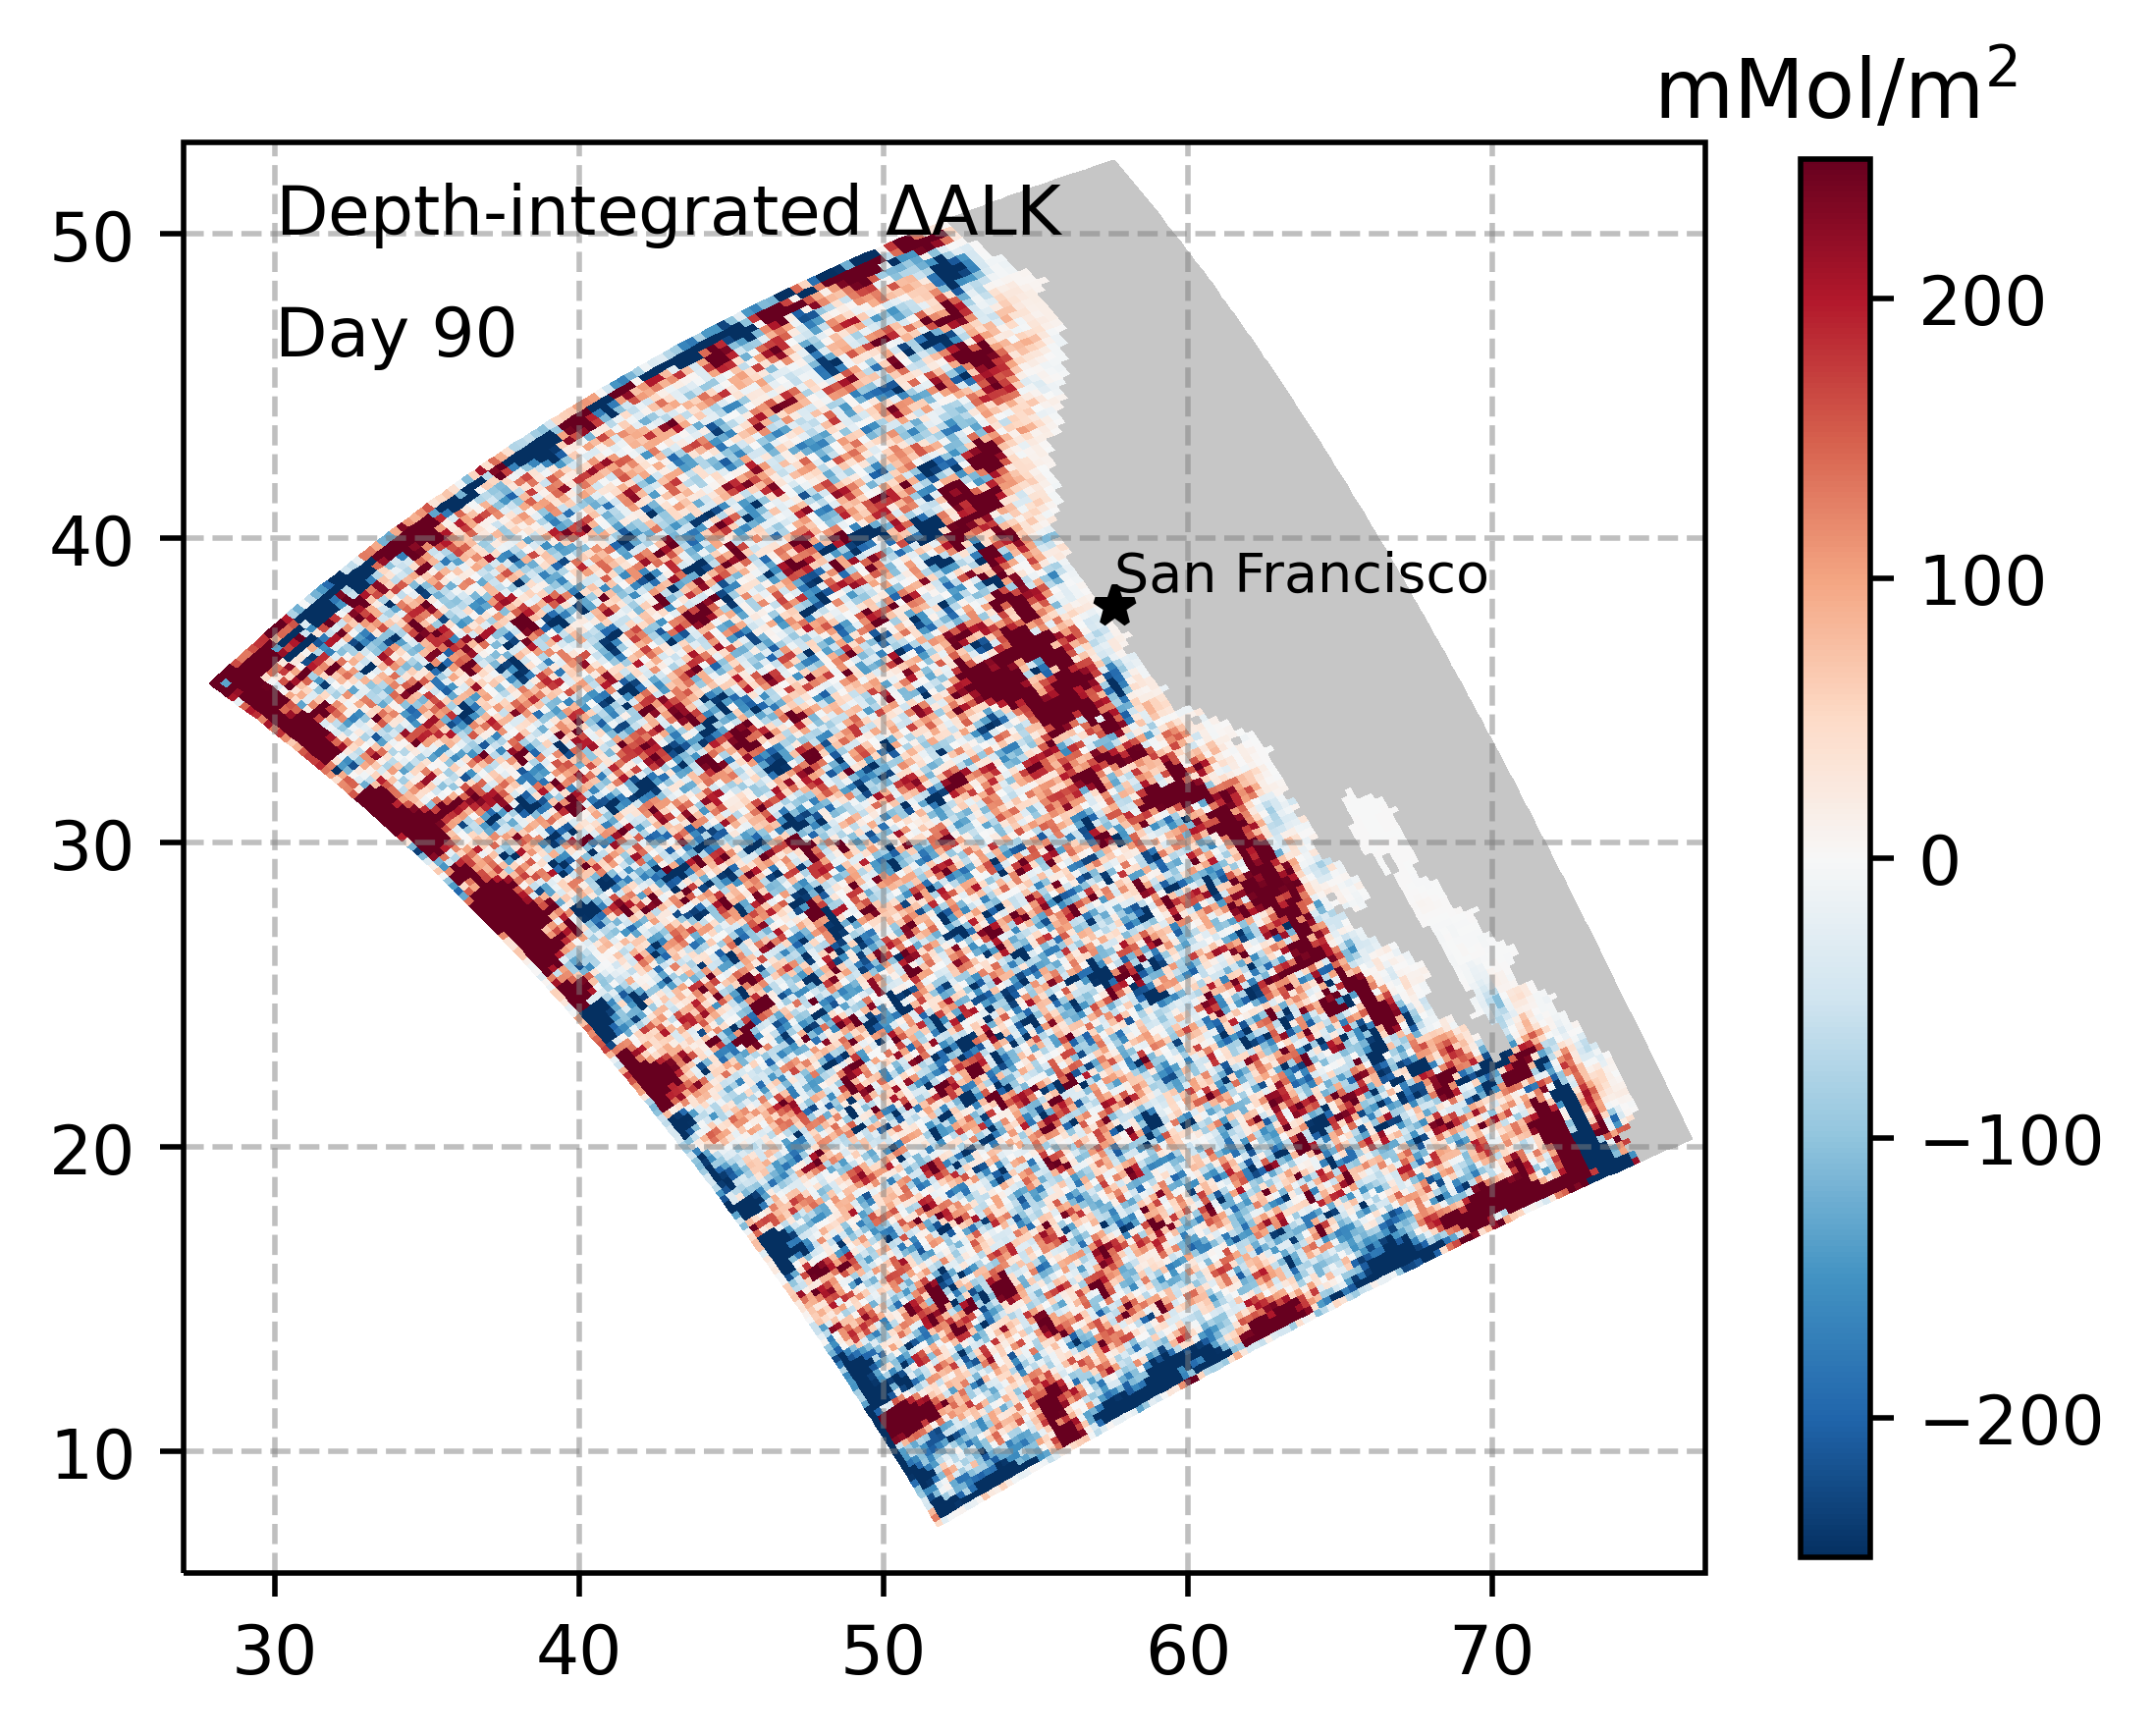

In [78]:
fig = plt.figure(figsize=(5,5),dpi=500)

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

test=dALK
mask= grd.mask_rho.where(grd.mask_rho>0)

#test = test.where(test>0).fillna(0.)
#test.isnan(te
sca = ax.pcolormesh(grd.lon_rho-180,
                grd.lat_rho,
                test*mask/area,
                transform=ccrs.PlateCarree(),
                cmap='RdBu_r',vmin=-250,vmax=250);
cb = fig.colorbar(sca, ax=ax, shrink=0.74)

sca = ax.pcolormesh(grd.lon_rho-180,
                grd.lat_rho,
                grd.mask_rho.where(grd.mask_rho<1),
                transform=ccrs.PlateCarree(),
                cmap='Greys',vmin=-1,vmax=2);


cb.ax.set_title('mMol/m$^2$')
true_lat = 37.78
true_lon = -122.43+180
plt.plot(true_lon,true_lat,'*',color='k',markersize=6,transform=ccrs.PlateCarree())
plt.text(true_lon,true_lat+.5,'San Francisco',fontsize=8,color='k',transform=ccrs.PlateCarree())
plt.text(30,50,'Depth-integrated $\Delta$ALK', fontsize=10)

plt.text(30,46,'Day 90', fontsize=10)
# plt.plot(xloc-10*resfac,yloc,'*',color='b')
# plt.contour(alk_flux[0,:])

#plt.text(xloc,yloc+2,'San Francisco',color='y')

ax.set_extent([27, 77, 6, 53], ccrs.PlateCarree())
ax.set_xticks(np.arange(30, 80, 10), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(10, 60, 10), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)  
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                   color='gray', alpha=0.5, linestyle='--')

In [70]:
timediff= (xr.open_dataset(control[5]).ocean_time[0]-xr.open_dataset(control[0]).ocean_time[0])/86400
print(timediff)
total_alk = (xr.open_dataset('/glade/u/home/eyankovsky/CWorthy/ALK_forcing.nc').ALK[0,:]*86400*(timediff))*area
print(np.nansum(total_alk))
print(np.nansum(dALK))
print(np.nansum(dALK)/np.nansum(total_alk))

<xarray.DataArray 'ocean_time' ()>
array(5.)
2115208804940.0469
2538250565964.539
1.200000000017248


In [71]:
np.nanmin(dALK)

-334010912.0